In [2]:
# Si necesitan instalar algunos paquetes
#!pip install scipy
#!pip install pandas
#!pip install seaborn
#!pip install scikit-learn

In [4]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para clustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Para componentes principales
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Ejercicio 1.** Utilizando los datos de pingüinos, 
1. Construir la matrix de datos $X$ con las variables "bill_length_mm" y "bill_depth_mm".
2. Construir la matriz $X^\star$ de datos normalizados (media 0).
3. Construir la matriz de covarianza $\Sigma$.
4. Comparar con el resultado de `np.cov(X.transpose(), bias = 1))`

In [5]:
# Eliminamos datos faltantes y reseteamos los índices, para no tener problemas al graficar
penguins = sns.load_dataset("penguins").dropna().reset_index(drop=True)

# Normalizamos las variables "bill_length_mm" y "bill_depth_mm" por MinMax
penguins[["bill_length_mm", "bill_depth_mm"]] = MinMaxScaler().fit_transform(penguins[["bill_length_mm", "bill_depth_mm"]])

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,181.0,3750.0,Male
1,Adelie,Torgersen,0.269091,0.511905,186.0,3800.0,Female
2,Adelie,Torgersen,0.298182,0.583333,195.0,3250.0,Female
3,Adelie,Torgersen,0.167273,0.738095,193.0,3450.0,Female
4,Adelie,Torgersen,0.261818,0.892857,190.0,3650.0,Male


In [6]:
# Item 1
# Nos quedamos con las variables de longitud y profundidad del pico
X = penguins[["bill_length_mm", "bill_depth_mm"]]
X.head()

,bill_length_mm,bill_depth_mm
0,0.254545,0.666667
1,0.269091,0.511905
2,0.298182,0.583333
3,0.167273,0.738095
4,0.261818,0.892857


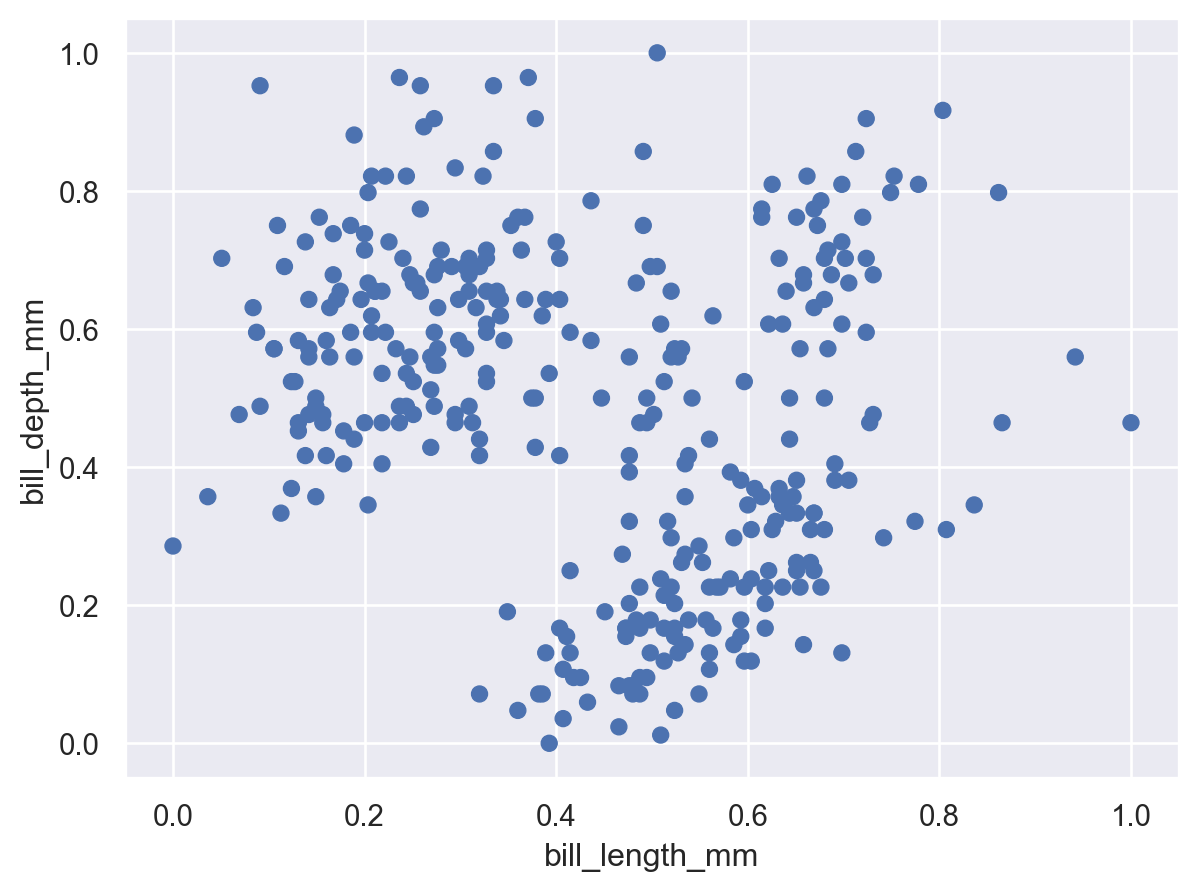

In [7]:
# Graficamos
(
    so.Plot(data = X, x = "bill_length_mm", y = "bill_depth_mm")
    .add(so.Dot())
)

In [11]:
# Media de cada columna 
length = X["bill_length_mm"].mean()
depth = X["bill_depth_mm"].mean()


In [15]:


X_raya = pd.DataFrame(data, columns = columnas)

X_raya

ValueError: Shape of passed values is (2, 1), indices imply (2, 2)

In [ ]:
X_star = ???
X_star.head()

In [ ]:
n = len(X_star)
Sigma = ???
Sigma

In [ ]:
# Comparamos con el comando np.cov de Numpy
# Ttenemos que pasarle las variables como columnas.
# Si no usamos bias = 1, divide por n-1 en lugar de n.
np.cov(X.transpose(), bias = 1)

**Ejercicio 2**
1. Calcular las componentes principales de la matriz X del ejercicio anterior.
2. Graficar los datos normalizados y las componentes principales.
3. Realizar un nuevo gráfico con los datos transformados.

In [ ]:
# eigh es un comando especial para calcular autovalores y autovectores de matrices simétricas
# Devuelve una dupla:
# - la primer componente es el vector de autovalores, ordenados de menor a mayor
# - la segunda componente es la matriz de autovectores. la i-ésima columna de U es el autovector correspondiente al i-ésimo autovalor
gamma, U = np.linalg.eigh(Sigma) 
print(gamma)
print(U)

In [ ]:
# Los autovalores que nos devuelve eigh están siempre ordenados de menor a mayor.
# Damos vueltas los autovalores y las columnas de la matriz de autovectores usando np.flip(-,1)
gamma = np.flip(gamma)
print(gamma)

U = np.flip(U, 1)   # U tiene los autovectores de Sigma como columnas
print(U)

In [ ]:
# Graficamos los autovectores
(
    so.Plot()
    .add(so.Dot(), x = X_star["bill_length_mm"], y = X_star["bill_depth_mm"])
    .add(so.Line(color = "green"), x = [0, U[0,0]], y = [0, U[1,0]]) # Primera dirección principal
    .add(so.Line(color = "red"), x = [0, U[0,1]], y = [0, U[1,1]]) # Segunda dirección principal
    .layout(size = (6,6))
)

In [ ]:
Z = ???
Z.columns = ["Z1", "Z2"]  # Renombramos las columnas
Z

In [ ]:
# Graficamos las nuevas variables.
(
    so.Plot(data = Z, x = "Z1", y = "Z2")
    .add(so.Dot())
)

**Ejercicio:** Para la matriz de covarianza
$$
M = \left(
   \begin{array}{cccc}
    3 & 1/2 & 1/3 & 0\\
    1/2 & 4 & 1/6 & 3/4\\
    1/3 & 1/6 & 2 & 0 \\
    0 & 3/4 & 0 & 5
   \end{array}
   \right)
$$
calcular la varianza explicada acumulada de las dos primeras componentes principales.

### Aplicación

En el archivo `paises.csv` se encuentran 11 variables ecónomicas y sociales asociadas a 21 países. Queremos usar esas variables para visualizar países con comportamientos similares.

In [ ]:
# Leemos los datos
datos = pd.read_csv("../Datos/paises.csv", index_col = "Pais")   # dataFrame
X = datos
X.columns = X.columns.str.strip()  # Los nombres tienen un espacio al principio, lo eliminamos
display(X)

In [ ]:
X.columns

Los variables corresponden a los siguientes indicadores:

1. X1 = Tasa anual de crecimiento de la población
2. X2 = Tasa de mortalidad infantil por cada 1000 nacidos vivos, 
3. X3 = Porcentaje de mujeres en la población activa, 
4. X4 = PNB en 1995 (en millones de dólares), 
5. X5 = Producción de electricidad (en millones kW/h), 
6. X6 = Líneas telefónicas por cada 1000 habitantes, 
7. X7 = Consumo de agua per cápita, 
8. X8 = Proporción de la superficie del país cubierta por bosques, 
9. X9 = Proporción de deforestación anual, 
10. X10 = Consumo de energía per cápita, 
11. X11 = Emisión de CO2 per cápita.



In [ ]:
# Graficamos algunos pares de variables
(
    so.Plot(data = X, x = "X1", y = "X2", text = X.index)
    .add(so.Dot())
    .add(so.Text())
)

In [ ]:
# Graficamos la información de dos variables 

# X4 = PNB en 1995 (en millones de dólares),
# X5 = Producción de electricidad (en millones kW/h),
(
    so.Plot(data = X, x = "X4", y = "X5", text = X.index)
    .add(so.Dot())
    .add(so.Text())
)

In [ ]:
# En estos ejemplos los países aparecen muy juntos, queremos ver si encontramos nuevas variables que nos permitan separar mejor a los países.

In [ ]:
# Como tenemos datos en distintas escalas llevamos los datos a media 0 y varianza 1.
# Esta normalización se obtiene restando la media y dividiendo por el desvío estandar.
X_star = StandardScaler().set_output(transform="pandas").fit_transform(X)
display(X_star)

In [ ]:
# Calculamos la matriz de covarianza:
# cov = (X - Xraya)^T * (X - Xraya) / N = (B^T * B) / N
X_star_t = np.transpose(X_star)
N = len(X_star)
Sigma = (X_star_t @ X_star) / N
display(Sigma)

In [ ]:
# Comparamos con el comando cov de numpy
display(np.cov(np.transpose(X_star), bias = 1))

# Tenemos que transponer X porque cov requiere variables en filas
# El parámetro bias = 1 hace que divida por N. Si no lo ponemos, o ponemos bias = 0, divide por N-1.

Obtuvimos la misma matriz!

Ahora podemos calcular las componentes principales.
Calculamos primero los autovalores y autovectores de la matriz de covarianza y los ordenamos los autovectores por autovalor.

In [ ]:
gamma, U = np.linalg.eigh(Sigma)  # Usamos eigh porque A es simétrica. Podemos usar eig también
display(gamma)
display(U)

In [ ]:
# Los autovalores están ordenados de menor a mayor.
# Damos vueltas las columnas de la matriz de autovectores usando np.flip(-,1)
gamma = np.flip(gamma)
U = np.flip(U, 1)   # U tiene los autovectores de Sigma como columnas
print(U)

In [ ]:
# U son las direcciones del nuevo espacio
# Calculamos las componentes principales usando la formula
# Z = (X - Xraya) * U

Z = X_star @ U 
Z.columns = ["Z" + str(i) for i in range(1,12)]  # Renombramos las columnas
display(Z)

In [ ]:
# Graficamos
(
    so.Plot(data = Z, x = "Z1", y = "Z2", text = X.index)
    .add(so.Dot())
    .add(so.Text())
    .layout(size=(12,8))    
)

In [ ]:
# Repetimos todo lo mismo usando los comandos de Python

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_star)
print(principalComponents)

In [ ]:
# Graficamos
(
    so.Plot(x = principalComponents[:,0], y = principalComponents[:,1], text = X.index)
    .add(so.Dot())
    .add(so.Text())
    .layout(size=(12,8))
)

In [ ]:
# Veamos que variables aparecen más fuertemente en cada componente
pca.components_    # Esto nos da las direcciones (los coeficientes de la combinación lineal z = v_1 x_1 + ... v_p x_p)

**Pregunta** Qué interpretación podemos darle a cada una de las dos componentes?
<details>
    Podemos interpetar que la primera componente agrupa las variables economicas, y la segunda componente las variable sociales.
</details>

**Ejercicio:** calcular el porcentaje de la varianza explicada por las primeras componentes principales y la varianza acumulada.

In [ ]:
print("Autovalores: ", gamma)
for i in range(3):
    print("Porcentaje de varianza explicada por la componente ", i + 1, ":", ???)

print("Variaza acumulada: ", ???)